In [3]:
# we are predicting energy consumption, by giving temperature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
df=pd.read_csv('/content/appliance_energy.csv')
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [5]:
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [6]:
df=df.dropna()

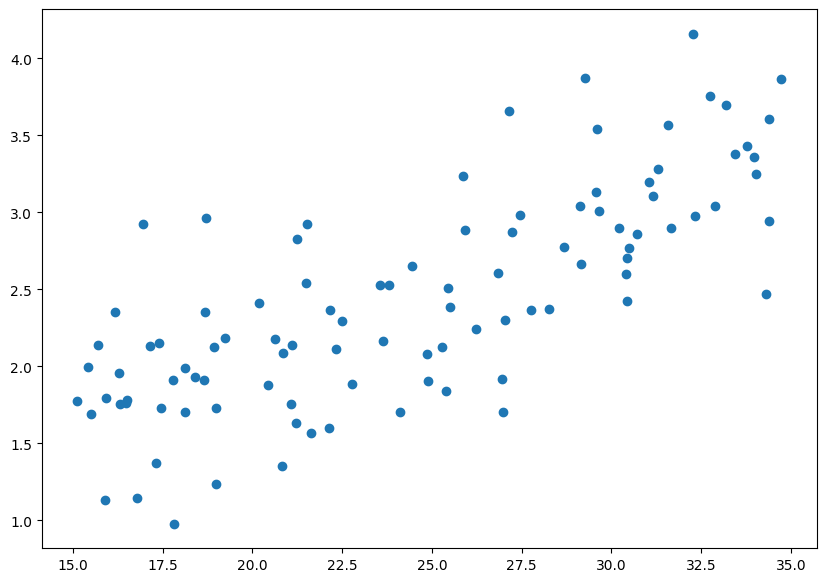

In [7]:
import seaborn as sns
plt.figure(figsize=(10,7))
plt.scatter(df['Temperature (°C)'],df['Energy Consumption (kWh)'])
plt.show()

In [8]:
X=df[['Temperature (°C)']]
y=df['Energy Consumption (kWh)']

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_test.head()

,Energy Consumption (kWh)
83,1.955394
53,3.037917
70,2.426014
45,2.370351
44,2.413076


In [12]:
print("Slope: ",model.coef_)
print("y-intercept: ",model.intercept_)

Slope:  [0.08996618]
y-intercept:  0.22196391661907633


In [13]:
  #y=mx+c
  print(model.coef_*22.49+model.intercept_)

[2.24530337]


In [14]:
2.24-2.29

-0.04999999999999982

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [17]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)

r2=r2_score(y_test,y_pred)
print("R2 Score: ",r2)

Mean Squared Error:  0.16342487842925055
R2 Score:  0.6119478445218713


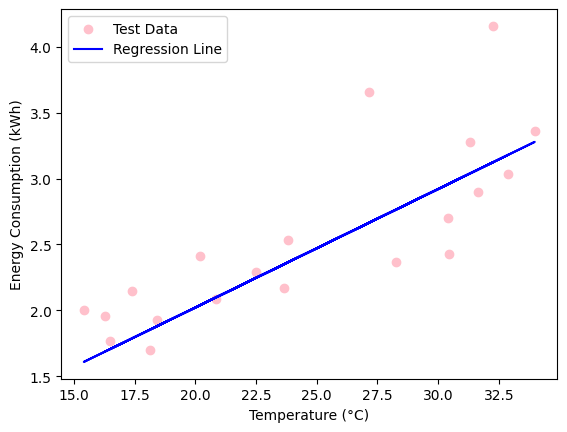

In [18]:
plt.scatter(X_test,y_test,color='pink',label='Test Data')
plt.plot(X_test,y_pred,color='blue',label='Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

In [19]:
#To save the model to a file
import joblib
joblib.dump(model,'energy_consumption_model.pkl')

['energy_consumption_model.pkl']

In [20]:
model=joblib.load('energy_consumption_model.pkl')

In [21]:
temp=np.array([[22.49]])

In [22]:
prediction=model.predict(temp)
print("The prediction is :",prediction)

The prediction is : [2.24530337]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
